# Malaria detection
Content
The dataset contains 2 folders

Infected
Uninfected
And a total of 27,558 images.
Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.
Photo by Егор Камелев on Unsplash
https://unsplash.com/@ekamelev

Inspiration
Save humans by detecting and deploying Image Cells that contain Malaria or not!

Data Explo

data source :https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

#### This dataset is analyzed with the help of google colab so we first unzip our data from google drive

In [1]:
!unzip "/content/drive/My Drive/Colab data/cell_images.zip"

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_167.pn

## Importing Important libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow
%tensorflow_version 2.x

In [4]:
print(tensorflow.test.gpu_device_name())

/device:GPU:0


#### the next line of code is to make sure we have a GPU to use tensorflow model because without GPU the model will converge very slowly

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9899269561141886335, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12654780759327707169
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11840184862876664768
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17508164399686558433
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [6]:
my_data_dir = '/content/cell_images'

In [7]:
os.listdir(my_data_dir)

['train', 'test']

In [8]:
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/test/'

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path+'/parasitized')[0]

'C177P138NThinF_IMG_20151201_142846_cell_159.png'

#### lets check an image from parasitized folder to see how the cell looks like for a malaria affected cell

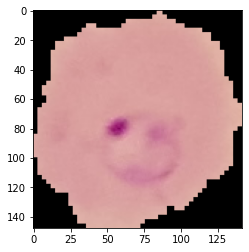

In [11]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_img = imread(para_cell)
plt.imshow(para_img)

In [12]:
para_img.shape

(148, 142, 3)

In [13]:
os.listdir(train_path+'/uninfected')[0]

'C171P132ThinF_IMG_20151119_153347_cell_93.png'

#### Lets check an uninfected cell

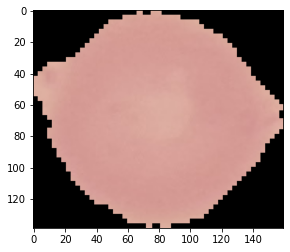

In [14]:
uninfected_para_cell = train_path+'/uninfected'+'/C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_para_img = imread(uninfected_para_cell)
plt.imshow(uninfected_para_img)

In [15]:
uninfected_para_img.shape

(139, 160, 3)

In [16]:
len(os.listdir(train_path+'/parasitized'))

12480

In [17]:
len(os.listdir(train_path+'/uninfected'))

12480

#### Visualizing the image dimensions

In [18]:
dim1 = []
dim2 = []
for i in os.listdir(test_path+'/uninfected'):
    img  = imread(test_path+'/uninfected'+'/'+i)
    d1,d2,col = img.shape
    dim1.append(d1)
    dim2.append(d2)

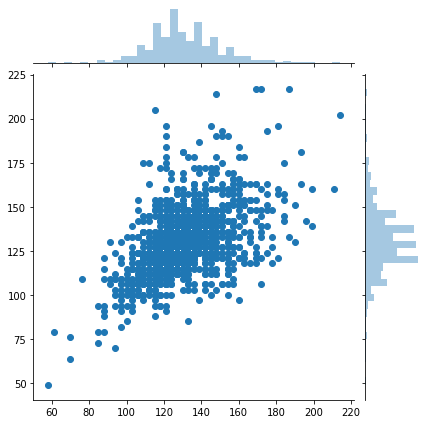

In [19]:
sns.jointplot(dim1,dim2)

In [20]:
np.mean(dim1)

130.92538461538462

In [21]:
np.mean(dim2)

130.75

In [22]:
image_shape = (130,130,3)

## Modelling

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,
                              shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [25]:
train_img_generator= image_gen.flow_from_directory(train_path,color_mode='rgb',target_size=(130,130),
                                                  batch_size=16,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [26]:
test_img_generator= image_gen.flow_from_directory(test_path,color_mode='rgb',target_size=(130,130),
                                                  batch_size=16,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [27]:
train_img_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [29]:
model = Sequential()
model.add(Conv2D(filters= 32,kernel_size = 4,input_shape = image_shape,activation ='relu'))
model.add(MaxPool2D(pool_size =2))

model.add(Conv2D(filters= 64,kernel_size = 4,input_shape = image_shape,activation ='relu'))
model.add(MaxPool2D(pool_size =2))

model.add(Conv2D(filters= 64,kernel_size = 4,input_shape = image_shape,activation ='relu'))
model.add(MaxPool2D(pool_size =2))
model.add(Flatten())
model.add(Dense(units = 256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer ='adam',metrics = ['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss',patience=4)

In [31]:
results = model.fit(train_img_generator,validation_data=test_img_generator,epochs=40,callbacks=[early])

Epoch 1/40
1560/1560 [==============================] - 125s 80ms/step - loss: 0.3438 - accuracy: 0.8443 - val_loss: 0.2433 - val_accuracy: 0.9173
Epoch 2/40
1560/1560 [==============================] - 124s 80ms/step - loss: 0.1874 - accuracy: 0.9414 - val_loss: 0.1941 - val_accuracy: 0.9381
Epoch 3/40
1560/1560 [==============================] - 126s 80ms/step - loss: 0.1649 - accuracy: 0.9461 - val_loss: 0.1566 - val_accuracy: 0.9504
Epoch 4/40
1560/1560 [==============================] - 127s 81ms/step - loss: 0.1591 - accuracy: 0.9483 - val_loss: 0.1673 - val_accuracy: 0.9435
Epoch 5/40
1560/1560 [==============================] - 127s 81ms/step - loss: 0.1601 - accuracy: 0.9481 - val_loss: 0.1604 - val_accuracy: 0.9465
Epoch 6/40
1560/1560 [==============================] - 127s 81ms/step - loss: 0.1524 - accuracy: 0.9513 - val_loss: 0.1571 - val_accuracy: 0.9508
Epoch 7/40
1560/1560 [==============================] - 124s 80ms/step - loss: 0.1515 - accuracy: 0.9510 - val_loss: 0

In [32]:
loss = pd.DataFrame(model.history.history)

In [33]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.343753,0.844258,0.243318,0.917308
1,0.187350,0.941382,0.194115,0.938077
2,0.164913,0.946069,0.156602,0.950385
3,0.159113,0.948273,0.167318,0.943462
4,0.160107,0.948113,0.160427,0.946538
5,0.152352,0.951318,0.157134,0.950769
6,0.151509,0.951038,0.180767,0.944231


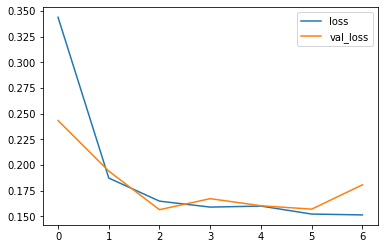

In [34]:
loss[['loss','val_loss']].plot()

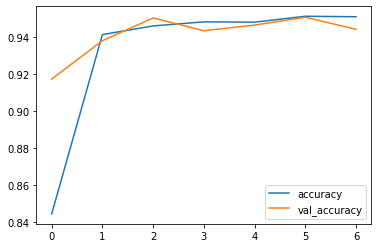

In [35]:
loss[['accuracy','val_accuracy']].plot()

In [40]:
y_true = test_img_generator.classes
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
pred = model.predict_classes(test_img_generator)
pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score

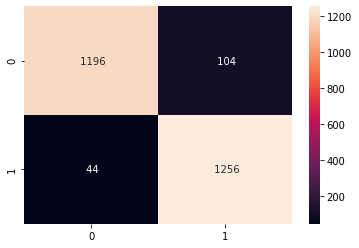

In [44]:
cm = confusion_matrix(y_true,pred)
sns.heatmap(cm, annot=True,fmt = ' ')
plt.show()

In [46]:
print(classification_report(y_true,pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.92      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [48]:
f1_score(y_true,pred)

0.9443609022556392

## Result:
from the classification report we can see that the model gives us a very good precesion and recall score. The f1_score is also very high so we can say that the model will perform very good for detecting Malaria infections and saving lives